In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')


In [18]:
car_data=pd.read_csv('car_data_final.csv')
car_data.drop(columns='Unnamed: 0',inplace=True)
car_data




,car_name,model_name,no_of_owner,KMS_Driven,mfg_year,colour,seating_capacity,milage,price,original_price,CNG,Diesel,Electric,Petrol
0,Honda,Amaze,1,36471,2021,14,5,19.0,9.20,7.99,0,0,0,1
1,Honda,Civic,1,29000,2019,13,5,16.5,16.90,17.02,0,0,0,1
2,Honda,Jazz,1,34356,2016,14,5,19.0,6.25,6.15,0,0,0,1
3,Maruti,Suzuki,1,32000,2017,7,5,20.5,4.25,4.48,0,0,0,1
4,Honda,Jazz,1,17847,2019,14,5,18.7,6.80,7.75,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1372,BMW,iX,0,2750,2022,1,5,326.0,7.45,8.44,0,0,1,0
1373,Tata,Nexon,1,20000,2021,6,5,127.0,15.25,15.63,0,0,1,0
1374,Tata,Nexon,1,20000,2021,6,5,127.0,15.25,15.63,0,0,1,0
1375,MG,ZS,1,7500,2021,2,5,340.0,23.00,23.60,0,0,1,0


In [19]:
# dividing the data into independent and dependent variables
Y=car_data['price']
Y

0        9.20
1       16.90
2        6.25
3        4.25
4        6.80
        ...  
1372     7.45
1373    15.25
1374    15.25
1375    23.00
1376    15.25
Name: price, Length: 1377, dtype: float64

In [20]:
X=car_data.drop(['price','original_price'],axis=1)
X


,car_name,model_name,no_of_owner,KMS_Driven,mfg_year,colour,seating_capacity,milage,CNG,Diesel,Electric,Petrol
0,Honda,Amaze,1,36471,2021,14,5,19.0,0,0,0,1
1,Honda,Civic,1,29000,2019,13,5,16.5,0,0,0,1
2,Honda,Jazz,1,34356,2016,14,5,19.0,0,0,0,1
3,Maruti,Suzuki,1,32000,2017,7,5,20.5,0,0,0,1
4,Honda,Jazz,1,17847,2019,14,5,18.7,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1372,BMW,iX,0,2750,2022,1,5,326.0,0,0,1,0
1373,Tata,Nexon,1,20000,2021,6,5,127.0,0,0,1,0
1374,Tata,Nexon,1,20000,2021,6,5,127.0,0,0,1,0
1375,MG,ZS,1,7500,2021,2,5,340.0,0,0,1,0


In [21]:
# dividig the data set into training and testing
from sklearn.model_selection import train_test_split

In [22]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2,random_state=42)

# model Biulding


In [7]:
import statsmodels.api as sm

In [13]:
from sklearn.compose import ColumnTransformer # to handle the categorivcal features in we are having in data.
from sklearn.pipeline import Pipeline          
from sklearn.preprocessing import OneHotEncoder   # to hanfle the categorical features
from sklearn.metrics import r2_score, mean_absolute_error,mean_squared_error

In [14]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor,ExtraTreesRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV

# Model No 1: LinearRegression

In [10]:
step1=ColumnTransformer(transformers=[
    ('col_trf', OneHotEncoder(sparse=False, drop='first',handle_unknown='ignore'),[0,1])
],remainder='passthrough')

step2=LinearRegression()

pipe=Pipeline([
    ('step1',step1),
    ('step2',step2)
])

model=pipe.fit(x_train,y_train)

y_pred=pipe.predict(x_test)

print('r2_score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))
print('MSE',mean_squared_error(y_test,y_pred))

r2_score 0.772291126767218
MAE 1.8964743811765232
MSE 31.383312654464294


In [11]:
import numpy as np
np.exp(1.89)

6.619368681043077

# Model no 2: Ridge regression

In [12]:
step1=ColumnTransformer(transformers=[
    ('col_trf', OneHotEncoder(sparse=False, drop='first',handle_unknown='ignore'),[0,1])
],remainder='passthrough')

step2=Ridge()  ## as alpha increases rigde slop line will decrease thhis will reduce increase the bias in model but 
                        #but reduce the varience as we can see by increasing the alpha overfitting reduces

pipe=Pipeline([
    ('step1',step1),
    ('step2',step2)
])

model=pipe.fit(x_train,y_train)
y_pred_train=pipe.predict(x_train)
y_pred=pipe.predict(x_test)

print('r2_score',r2_score(y_train,y_pred_train))
print('r2_score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))
print('MSE',mean_squared_error(y_test,y_pred))

# By using the GridserachCV we will find the best hyperparameter for rigde  model
# generally alpga varies from 0 to infinity but 0 t0 10 is good value to check in ridge model.

parameters=[ {'step2__alpha': np.arange(0, 10, 0.01) } ]
 
clf = GridSearchCV(pipe, parameters)
clf.fit(x_train,y_train)
print('best:',clf.best_estimator_)


r2_score 0.9267286252795568
r2_score 0.7760132259138347
MAE 2.1772453325556143
MSE 30.870325173604147
best: Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('col_trf',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse=False),
                                                  [0, 1])])),
                ('step2', Ridge(alpha=1.08))])


# Notes on  Ridge model:
1. Reducing the values of lambda can make the models complex and vice versa. 
2. We should find the perfect balance to prevent overfitting. Lambda is a positive value and can range from 0 to positive infinity. But typically chosen to be between 0 and 10.
3. here alpha is hyperparameter as we keep inreasing the alpha values model get less sensitive and reduce the overfitting issue
4. This model is similar to OLS model but instead of loss finction we try to reduce the ( loss + penalty ) terms.
5. Penalty term is (alpha* sum of square of weight i.e slope)

# Model No 3 : Lasso Regression

In [13]:
step1=ColumnTransformer(transformers=[
    ('col_trf', OneHotEncoder(sparse=False, drop='first',handle_unknown='ignore'),[0,1])
],remainder='passthrough')

step2=Lasso(alpha=0.01)

pipe=Pipeline([
    ('step1',step1),
    ('step2',step2)
])

model=pipe.fit(x_train,y_train)

y_pred=pipe.predict(x_test)
y_pred_train=pipe.predict(x_train)

print('r2_score_testing',r2_score(y_test,y_pred))
print('r2_score_training',r2_score(y_train,y_pred_train))
print('MAE',mean_absolute_error(y_test,y_pred))
print('MSE',mean_squared_error(y_test,y_pred))



#finding the best alpha value for lasso regression using gridserachcv 
parameters=[{'step2__alpha':np.arange(0,10,0.2)}]
clf=GridSearchCV(pipe,parameters)
clf.fit(x_train,y_train)
print('best:',clf.best_estimator_)




r2_score_testing 0.7671975985095667
r2_score_training 0.92027157061438
MAE 2.3602170136407707
MSE 32.08531336069415
best: Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('col_trf',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse=False),
                                                  [0, 1])])),
                ('step2', Lasso(alpha=0.0))])


# Note on Lasso Regression model:
1. Similar to the Ridge model but instead  of sum of square we use absolute weight in penalty term.
2. due to this, this model try to reduce the coeficient to zero hence reduce the features by eliminating the coeff.
3. along with the reducing the overfitting issue this model help in feature selection, as non significant feature's coeff will reach to zero 
4. here again alpha is hyperparameter

In [14]:
pipe.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'step1', 'step2', 'step1__n_jobs', 'step1__remainder', 'step1__sparse_threshold', 'step1__transformer_weights', 'step1__transformers', 'step1__verbose', 'step1__verbose_feature_names_out', 'step1__col_trf', 'step1__col_trf__categories', 'step1__col_trf__drop', 'step1__col_trf__dtype', 'step1__col_trf__handle_unknown', 'step1__col_trf__sparse', 'step2__alpha', 'step2__copy_X', 'step2__fit_intercept', 'step2__max_iter', 'step2__normalize', 'step2__positive', 'step2__precompute', 'step2__random_state', 'step2__selection', 'step2__tol', 'step2__warm_start'])

# Model no 4: KNeighbors Regression

In [15]:
step1=ColumnTransformer(transformers=[
    ('col_trf', OneHotEncoder(sparse=False, drop='first',handle_unknown='ignore'),[0,1])
],remainder='passthrough')

step2=KNeighborsRegressor(n_neighbors=4)

pipe=Pipeline([
    ('step1',step1),
    ('step2',step2)
])

model=pipe.fit(x_train,y_train)

y_pred=pipe.predict(x_test)
y_pred_train=pipe.predict(x_train)

print('r2_score',r2_score(y_test,y_pred))
print('r2_score_train',r2_score(y_train,y_pred_train))
print('MAE',mean_absolute_error(y_test,y_pred))
print('MSE',mean_squared_error(y_test,y_pred))

# finding the best value of K using th GridSearchCv Method
k_range = list(range(1, 31))
param_grid = dict(step2__n_neighbors=k_range)
clf=GridSearchCV(pipe,param_grid,scoring='accuracy',verbose=1)
clf.fit(x_train,y_train)
print('best values of k:',clf.best_params_)

r2_score 0.53002549039422
r2_score_train 0.846394128729493
MAE 2.5700452898550723
MSE 64.77286881793478
Fitting 5 folds for each of 30 candidates, totalling 150 fits
best values of k: {'step2__n_neighbors': 1}


# note on KKN model:
1. this model can be used for classification as well as regression model.
2. n_neighbours(K) is hyperparamerer
3. work on finding the distance between nearest neighbour

# Model no 5:Decision Tree Regression

In [16]:
step1=ColumnTransformer(transformers=[
    ('col_trf', OneHotEncoder(sparse=False, drop='first',handle_unknown='ignore'),[0,1])
],remainder='passthrough')

step2=DecisionTreeRegressor(max_depth=9)

pipe=Pipeline([
    ('step1',step1),
    ('step2',step2)
])

model=pipe.fit(x_train,y_train)

y_pred=pipe.predict(x_test)
y_pred_train=pipe.predict(x_train)

print('r2_score_test',r2_score(y_test,y_pred))
print('r2_score_train',r2_score(y_train,y_pred_train))
print('MAE',mean_absolute_error(y_test,y_pred))
print('MSE',mean_squared_error(y_test,y_pred))

# finding the best values of max_depth (hyperparameter) by using the GridSearchCV method
parameters={"step2__max_depth" : [1,2,3,4,5,6,7,8,9,10]}
clf=GridSearchCV(pipe,param_grid=parameters)
clf.fit(x_train,y_train)
print('best values of max_depth:',clf.best_params_)

r2_score_test 0.8422948571150196
r2_score_train 0.9518497304022272
MAE 1.8686195999556157
MSE 21.735252281173647
best values of max_depth: {'step2__max_depth': 8}


In [17]:
from sklearn import datasets,tree
text_representation = tree.export_text(step2)
print(text_representation)

|--- feature_0 <= 0.50
|   |--- feature_45 <= 0.50
|   |   |--- feature_90 <= 156.50
|   |   |   |--- feature_89 <= 6.50
|   |   |   |   |--- feature_12 <= 0.50
|   |   |   |   |   |--- feature_77 <= 0.50
|   |   |   |   |   |   |--- feature_70 <= 0.50
|   |   |   |   |   |   |   |--- feature_30 <= 0.50
|   |   |   |   |   |   |   |   |--- feature_20 <= 0.50
|   |   |   |   |   |   |   |   |   |--- value: [7.74]
|   |   |   |   |   |   |   |   |--- feature_20 >  0.50
|   |   |   |   |   |   |   |   |   |--- value: [26.00]
|   |   |   |   |   |   |   |--- feature_30 >  0.50
|   |   |   |   |   |   |   |   |--- value: [41.75]
|   |   |   |   |   |   |--- feature_70 >  0.50
|   |   |   |   |   |   |   |--- feature_87 <= 2013.50
|   |   |   |   |   |   |   |   |--- feature_87 <= 2012.50
|   |   |   |   |   |   |   |   |   |--- value: [2.78]
|   |   |   |   |   |   |   |   |--- feature_87 >  2012.50
|   |   |   |   |   |   |   |   |   |--- value: [3.24]
|   |   |   |   |   |   |   |--- feat

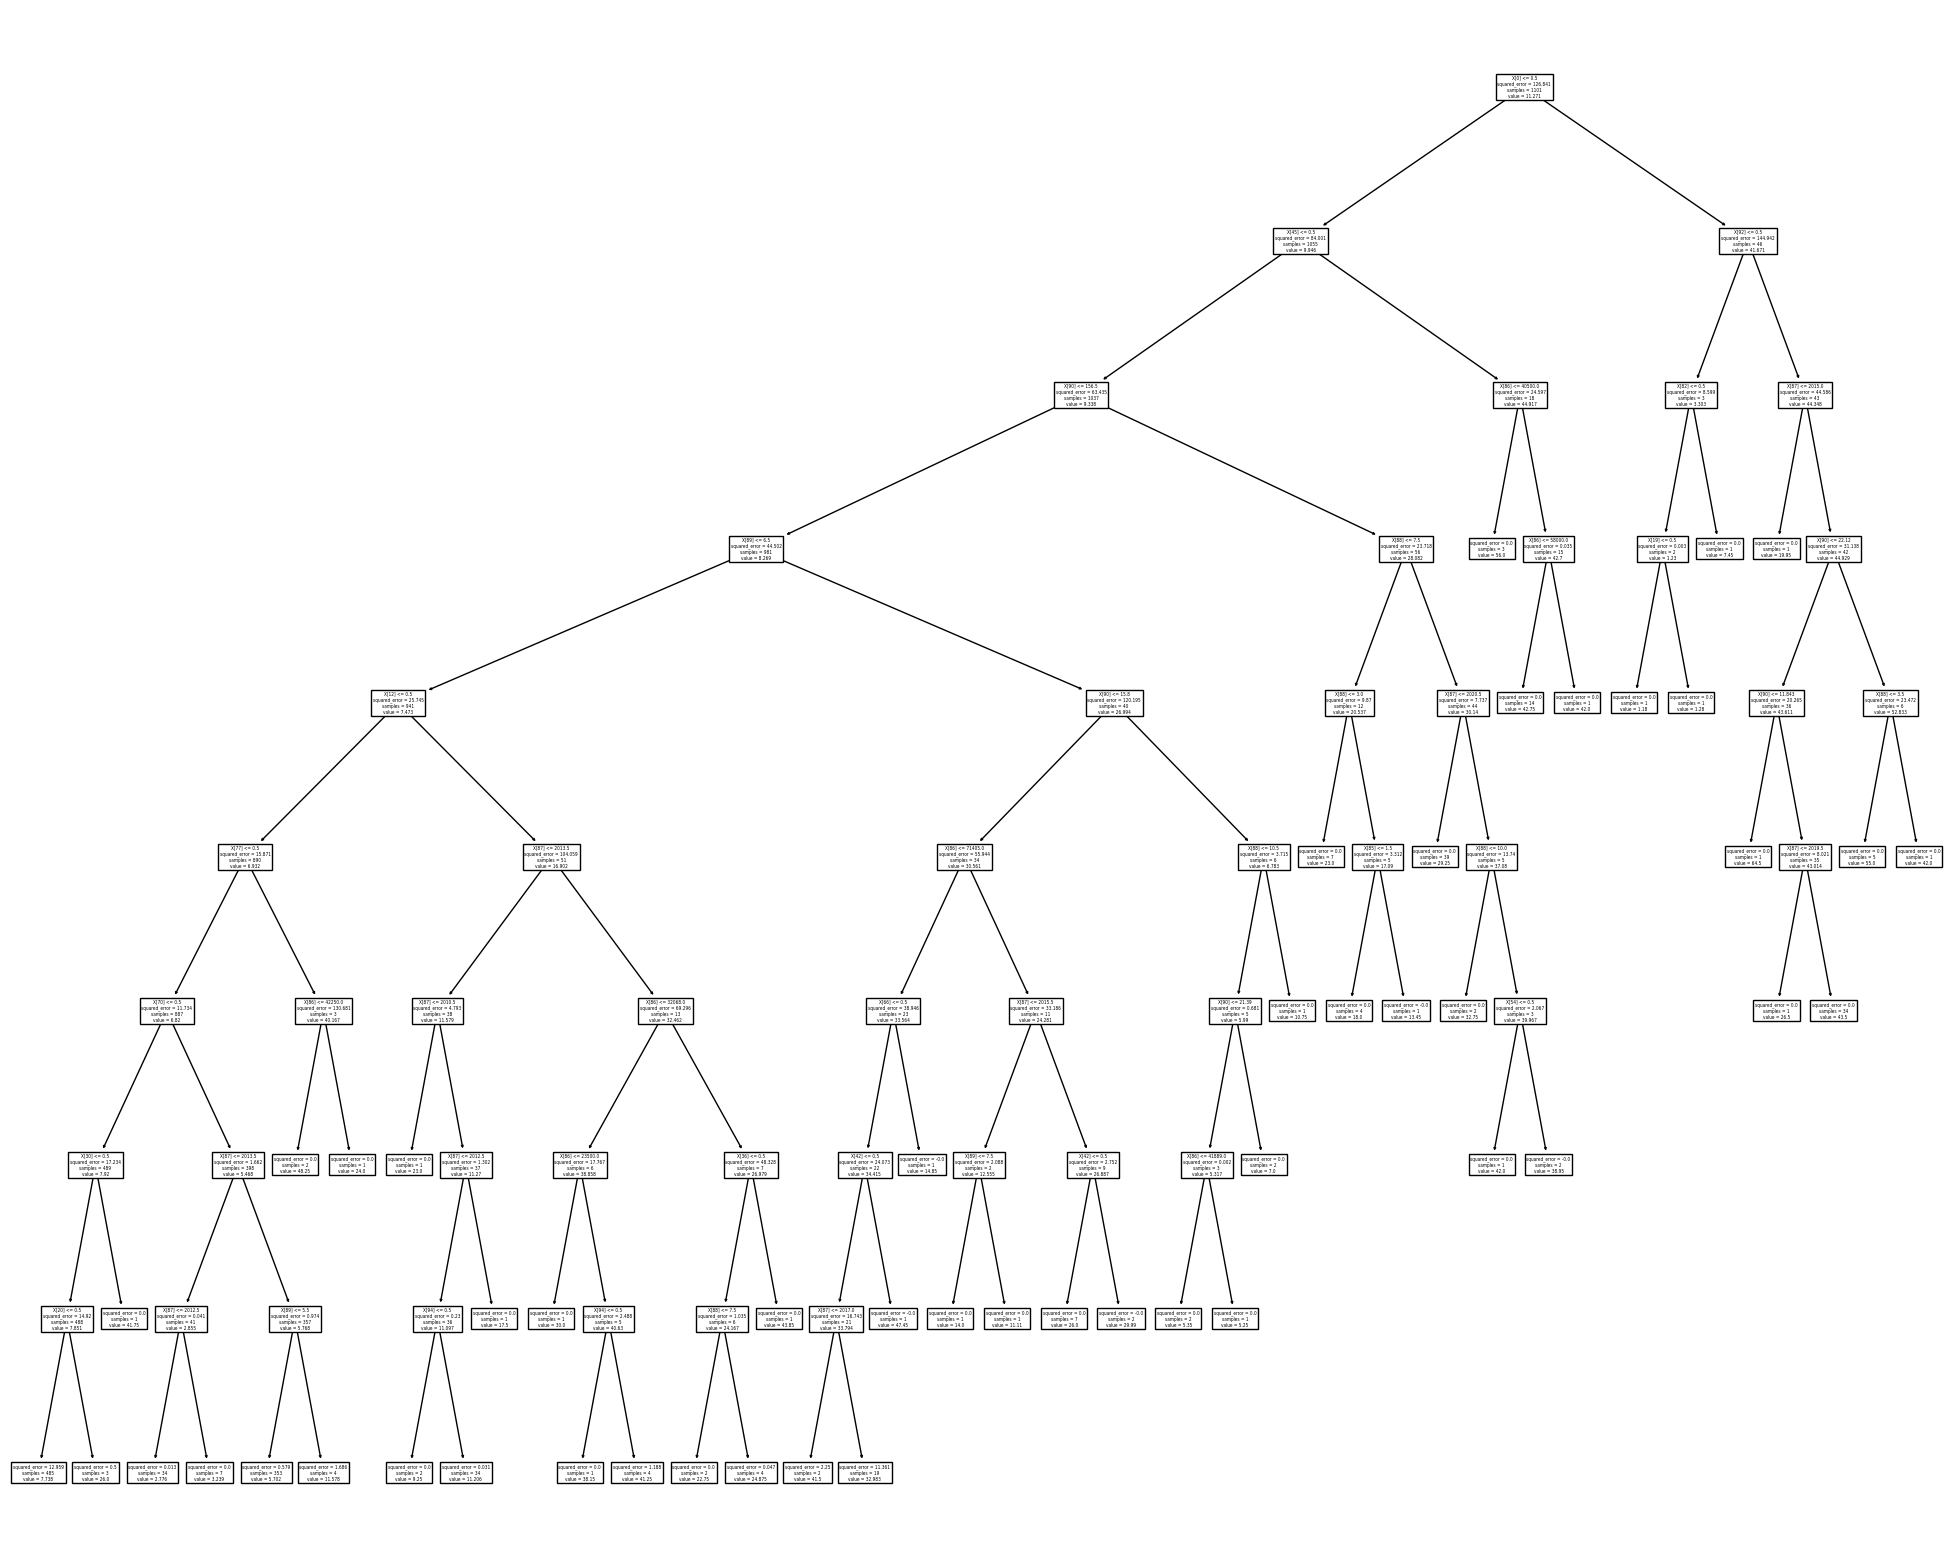

In [18]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(step2, 
                   )

In [19]:
fig.savefig("decistion_tree.png")

# Notes on Decision Tree Regression:
1. MAx_depth is hyperparameter, generally odd no 
2. it works on splitting the best node such the in each splitting the max impurity get reduced or node splitting with highest reduction in variation

# Model no 6: SVR Regressor

In [20]:
step1=ColumnTransformer(transformers=[
    ('col_trf', OneHotEncoder(sparse=False, drop='first',handle_unknown='ignore'),[0,1])
],remainder='passthrough')

step2=SVR(kernel='rbf',C=10000,epsilon=0.2)

pipe=Pipeline([
    ('step1',step1),
    ('step2',step2)
])

model=pipe.fit(x_train,y_train)


y_pred=pipe.predict(x_test)
y_pred_train=pipe.predict(x_train)

print('r2_score_test',r2_score(y_test,y_pred))
print('r2_score_train',r2_score(y_train,y_pred_train))
print('MAE',mean_absolute_error(y_test,y_pred))
print('MSE',mean_squared_error(y_test,y_pred))




r2_score_test -0.6832607988187682
r2_score_train -0.04373552555221738
MAE 6.002096486193655
MSE 231.99052008100497


# Model no 7 : Random Forest Regressor

In [21]:
step1=ColumnTransformer(transformers=[
    ('col_trf', OneHotEncoder(sparse=False, drop='first',handle_unknown='ignore'),[0,1])
],remainder='passthrough')

step2=RandomForestRegressor( n_estimators=300,
                            random_state=1,
                            max_samples=0.9,
                            max_features=0.9,
                            max_depth=15,
                           bootstrap=True)

pipe=Pipeline([
    ('step1',step1),
    ('step2',step2)
])

model=pipe.fit(x_train,y_train)

y_pred=pipe.predict(x_test)
y_pred_train=pipe.predict(x_train)

print('r2_score_train',r2_score(y_train,y_pred_train))
print('r2_score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))
print('MSE',mean_squared_error(y_test,y_pred))


# # Create the parameter grid based on the results of random search 
# param_grid = {
#     'step2__bootstrap': [True],
#     'step2__max_depth': [1,3,5,7,9,11,13,15,17,19],
#     'step2__max_features': [2, 3],
#     'step2__min_samples_leaf': [3, 4, 5],
#     'step2__min_samples_split': [8, 10, 12],
#     'step2__n_estimators': [100, 200, 300, 1000]
# }

# # Instantiate the grid search model
# clf = GridSearchCV(estimator = pipe, param_grid = param_grid, 
#                           cv = 3, n_jobs = -1, verbose = 2)
# clf.fit(x_train,y_train)
# print('best values of max_depth:',clf.best_params_)

r2_score_train 0.9824869969231311
r2_score 0.8490616904182455
MAE 1.4250237939669
MSE 20.80263317757515


r2_score_train 0.9884266384050977  
r2_score 0.8533869944129645  
MAE 1.1186416985852368  
MSE 20.20651074429122  
Fitting 3 folds for each of 720 candidates, totalling 2160 fits  
best values of max_depth: {'step2__bootstrap': True, 'step2__max_depth': 13, 'step2__max_features': 3,   'step2__min_samples_leaf': 3, 'step2__min_samples_split': 8, 'step2__n_estimators': 100}  

# Model no 8: Extra tree Regressor

In [22]:
step1=ColumnTransformer(transformers=[
    ('col_trf', OneHotEncoder(sparse=False, drop='first',handle_unknown='ignore'),[0,1])
],remainder='passthrough')

step2=ExtraTreesRegressor( n_estimators=100,
                            random_state=3,
                            max_samples=None,
                            max_features=0.75,
                            max_depth=15)

pipe=Pipeline([
    ('step1',step1),
    ('step2',step2)
])

model=pipe.fit(x_train,y_train)

y_pred=pipe.predict(x_test)
y_pred_train=pipe.predict(x_train)

print('r2_score_train',r2_score(y_train,y_pred_train))
print('r2_score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))
print('MSE',mean_squared_error(y_test,y_pred))

r2_score_train 0.9805847578703613
r2_score 0.8835843380654034
MAE 1.369075202204222
MSE 16.044649751680772


# Model no 9: AdaBoostRegressor

In [23]:
step1=ColumnTransformer(transformers=[
    ('col_trf', OneHotEncoder(sparse=False, drop='first',handle_unknown='ignore'),[0,1])
],remainder='passthrough')

step2=AdaBoostRegressor( n_estimators=15,
                        learning_rate=0.1)

pipe=Pipeline([
    ('step1',step1),
    ('step2',step2)
])

model=pipe.fit(x_train,y_train)

y_pred=pipe.predict(x_test)
y_pred_train=pipe.predict(x_train)

print('r2_score_train',r2_score(y_train,y_pred_train))
print('r2_score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))
print('MSE',mean_squared_error(y_test,y_pred))

r2_score_train 0.8489002604933098
r2_score 0.6574574026630118
MAE 3.4098745297809123
MSE 47.209936429264


# Model no 10: Gradient Boosting Regressor

In [24]:
step1=ColumnTransformer(transformers=[
    ('col_trf', OneHotEncoder(sparse=False, drop='first',handle_unknown='ignore'),[0,1])
],remainder='passthrough')

step2=GradientBoostingRegressor( n_estimators=500,
                            )

pipe=Pipeline([
    ('step1',step1),
    ('step2',step2)
])

model=pipe.fit(x_train,y_train)

y_pred=pipe.predict(x_test)
y_pred_train=pipe.predict(x_train)

print('r2_score_train',r2_score(y_train,y_pred_train))
print('r2_score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))
print('MSE',mean_squared_error(y_test,y_pred))

r2_score_train 0.9974202289635448
r2_score 0.8716282471628997
MAE 0.926969677140458
MSE 17.69246317937662


# Model no 11: XGRegressor

In [23]:
step1=ColumnTransformer(transformers=[
    ('col_trf', OneHotEncoder(sparse=False, drop='first',handle_unknown='ignore'),[0,1])
],remainder='passthrough')

step2=XGBRegressor( n_estimators=300,
                 learning_rate=0.4,
                max_depth=5)

pipe=Pipeline([
    ('step1',step1),
    ('step2',step2)
])

XGBR_model=pipe.fit(x_train,y_train)

y_pred=pipe.predict(x_test)
y_pred_train=pipe.predict(x_train)

print('r2_score',r2_score(y_test,y_pred))
print('r2_score_train',r2_score(y_train,y_pred_train))
print('MAE',mean_absolute_error(y_test,y_pred))
print('MSE',mean_squared_error(y_test,y_pred))

r2_score 0.8866770061421878
r2_score_train 0.9982521814617789
MAE 0.8192185267330945
MSE 15.618411775916922


# We will select the XGboost Model for our prediction 

### Manually checking the results for car data

In [51]:
car_data[0:5]

,car_name,model_name,no_of_owner,KMS_Driven,mfg_year,colour,seating_capacity,milage,price,original_price,CNG,Diesel,Electric,Petrol
0,Honda,Amaze,1,36471,2021,14,5,19.0,9.20,7.99,0,0,0,1
1,Honda,Civic,1,29000,2019,13,5,16.5,16.90,17.02,0,0,0,1
2,Honda,Jazz,1,34356,2016,14,5,19.0,6.25,6.15,0,0,0,1
3,Maruti,Suzuki,1,32000,2017,7,5,20.5,4.25,4.48,0,0,0,1
4,Honda,Jazz,1,17847,2019,14,5,18.7,6.80,7.75,0,0,0,1


In [52]:
pipe.predict(car_data[0:5])

array([ 9.199494 , 16.899609 ,  6.2491765,  4.26518  ,  6.79988  ],
      dtype=float32)

## we can say that model is giving the good accurate results

# files for model Deplyment

In [24]:
import pickle

In [25]:
pickle.dump(XGBR_model,open('XGBR_model.pkl','wb'))

In [26]:
pickled_model = pickle.load(open('XGBR_model.pkl', 'rb'))


In [27]:
pickled_model.predict(car_data[0:5])

array([ 9.199494 , 16.899609 ,  6.2491765,  4.26518  ,  6.79988  ],
      dtype=float32)

In [28]:
pickle.dump(car_data,open('car_data.pkl','wb'))
pickle.dump(pipe,open('pipe.pkl','wb'))